<a href="https://colab.research.google.com/github/MukeshMishraReloaded/Intro-to-ML-models/blob/main/Problems_BiasVariance_1stJune2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://colab.research.google.com/drive/1gBjVK38JH_mlVqo755LmpInBmFS74db8?usp=sharing

In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
mean = np.array([4.0, 5.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 5000)

In [ ]:
data.shape

(5000, 2)

In [ ]:
data[:5]

array([[3.80732901, 3.76896846],
       [3.19998715, 4.72393109],
       [2.78249642, 4.18256257],
       [5.36383987, 5.77740791],
       [5.81186241, 8.14248292]])

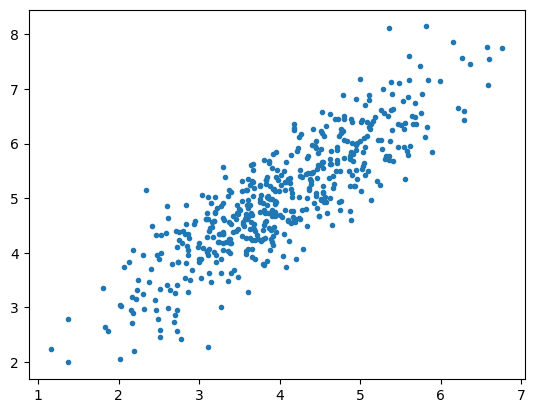

In [ ]:
# visualising data
plt.scatter(data[:500, 0], data[:500, 1], marker = '.')
plt.show()

In [ ]:
# adding bias column (for w0) to data
data = np.hstack((np.ones((data.shape[0], 1)), data))

In [ ]:
data[:5]

array([[1.        , 3.80732901, 3.76896846],
       [1.        , 3.19998715, 4.72393109],
       [1.        , 2.78249642, 4.18256257],
       [1.        , 5.36383987, 5.77740791],
       [1.        , 5.81186241, 8.14248292]])

In [ ]:
X = data[:,:-1] # data[1] is my x
Y = data[:,-1] # data[2] is my y
Y = Y.reshape(-1,1)

In [ ]:
# function to compute hypothesis / predictions
def predict(X, weight):
    return np.dot(X, weight)

In [ ]:
# function to compute gradient of error function w.r.t. weight
def gradient(X, y, weight):
    y_pred = predict(X, weight)
    grad = np.dot(X.transpose(), (y_pred - y))
    return grad


In [ ]:
# function to compute the cost/error for current values of weight
def cost(X, y, weight):
    y_pred = predict(X, weight)
    e = np.mean((y-y_pred)**2)

    return e

In [ ]:
# function to create a list containing mini-batches
def create_mini_batches(X, y, batch_size = 32):

    mini_batches = []
    data = np.hstack((X, y))

    np.random.shuffle(data)
    minibatch_count = data.shape[0] // batch_size
    i = 0

    for i in range(minibatch_count + 1):
        # stores 32 datapoint for a single set out of 156
        mini_batch = data[i * batch_size: (i + 1)*batch_size, :]
        X_minibatch = mini_batch[:, :-1]
        Y_minibatch = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((X_minibatch, Y_minibatch))

    return mini_batches

In [ ]:
# function to perform mini-batch gradient descent
def gradientDescent(X, y, learning_rate = 0.0001, batch_size = 32,max_epochs=3):
    weight = np.zeros((X.shape[1], 1))
    error_list = []
    #max_iters = 3 # number of epochs

    for itr in range(max_epochs):
        # creates mini- batch
        mini_batches = create_mini_batches(X, y, batch_size)

        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            weight = weight - learning_rate * gradient(X_mini, y_mini, weight)
            error_list.append(cost(X_mini, y_mini, weight))

    return weight, error_list

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3432: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(5000, 2)
(5000, 1)
w_0 =  [0.32829649]
w_1 =  [[1.16139919]]


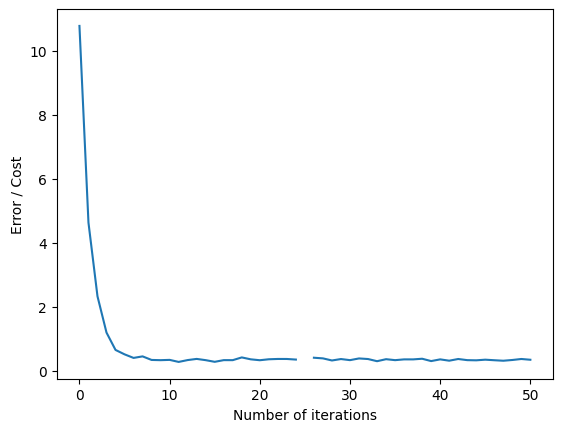

In [ ]:
weight, error_list = gradientDescent(X, Y,learning_rate = 0.0001, batch_size = 200, max_epochs=2)
print(X.shape)
print(Y.shape)
print("w_0 = ", weight[0])
print("w_1 = ", weight[1:])

# visualising gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Error / Cost")
plt.show()

In [ ]:
a = [1,2,3,4,5]
np.random.shuffle(a)
print(a)

[1, 2, 4, 5, 3]


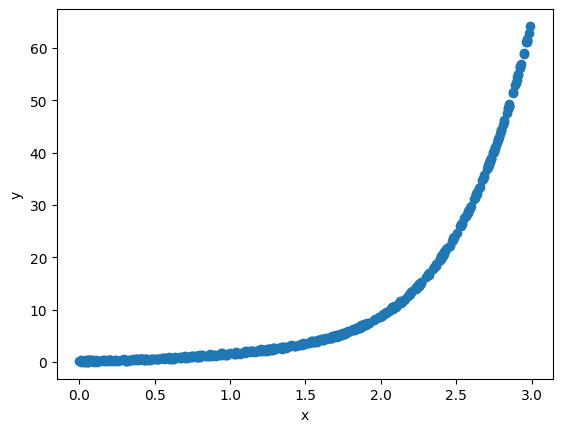

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
N = 500
X = np.random.rand(N,1)*3
#print(X[:10])
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(N,1) # no data in world is perfect
fig = plt.figure()
plt.scatter(X, y)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

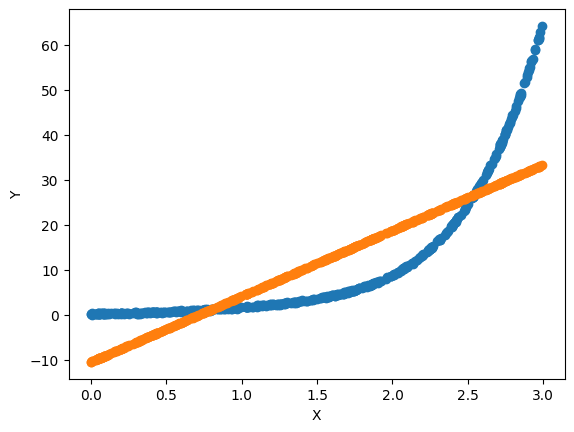

0.6775286163986958

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
output = model.predict(X)
fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model.score(X, y))

(500, 1)
(500, 1)


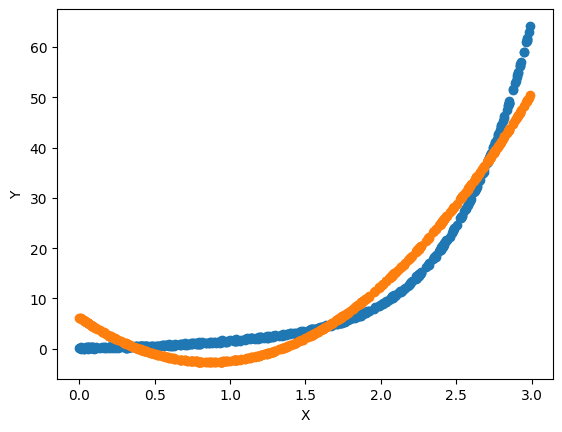

0.9405004255347973

In [ ]:
from sklearn.preprocessing import StandardScaler

#adding new feature X^2
X_deg2 = np.hstack([X, X**2])
model_deg2 = LinearRegression()
model_deg2.fit(X_deg2, y)
output = model_deg2.predict(X_deg2)

print(X.shape)
print(y.shape)
fig = plt.figure()

plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
display(model_deg2.score(X_deg2, y))


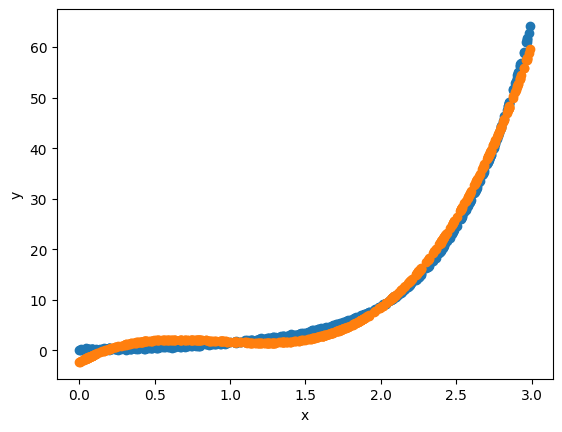

0.993758731191406

In [ ]:
#Adding X^3 as feature
X_deg3 = np.hstack([X, X**2, X**3])

model_deg3 = LinearRegression()
model_deg3.fit(X_deg3, y)
output = model_deg3.predict(X_deg3)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model_deg3.score(X_deg3, y))

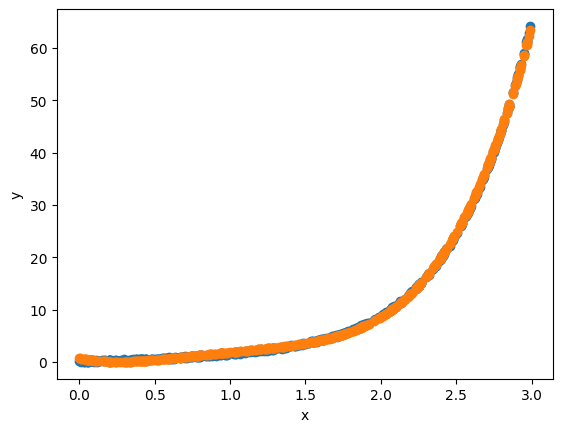

0.9997669404500598

In [ ]:
#Adding X^4 as feature
X_deg4 = np.hstack([X, X**2, X**3, X**4])

model_deg4 = LinearRegression()
model_deg4.fit(X_deg4, y)
output = model_deg4.predict(X_deg4)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model_deg4.score(X_deg4, y))

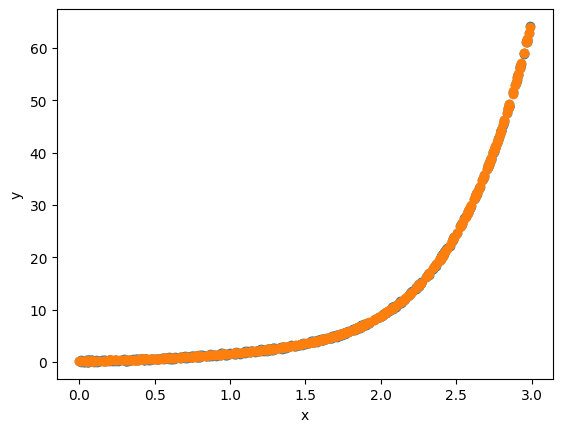

0.9999505304308682

In [ ]:
#Adding X^5 as feature
X_deg5 = np.hstack([X, X**2, X**3, X**4, X**5])

model_deg5 = LinearRegression()
model_deg5.fit(X_deg5, y)
output = model_deg5.predict(X_deg5)

fig = plt.figure()
plt.scatter(X, y, label="samples")
plt.scatter(X, output, label="prediction")
plt.xlabel("x")
plt.ylabel("y")
plt.show()
display(model_deg5.score(X_deg5, y))

(500, 2)


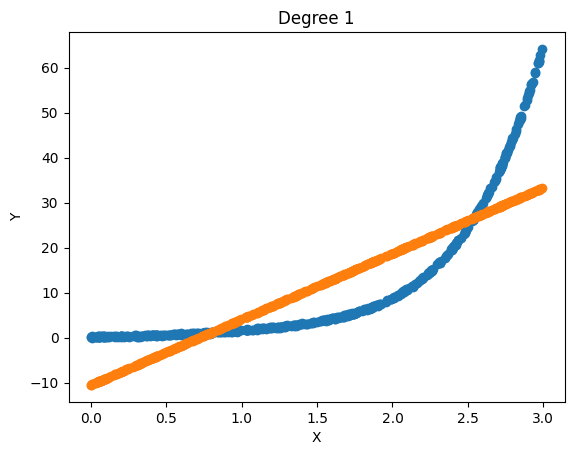

0.6775286163986958

(500, 3)


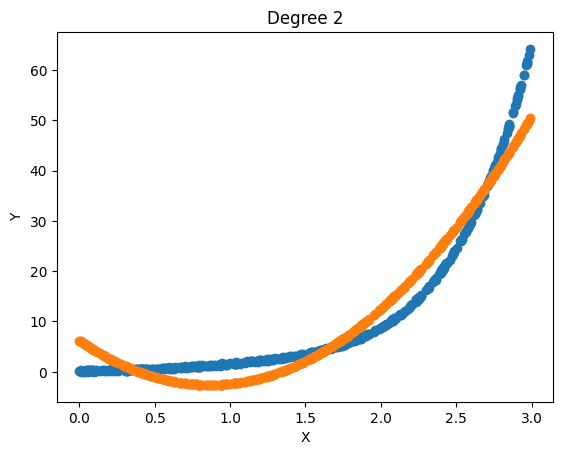

0.9405004255347973

(500, 4)


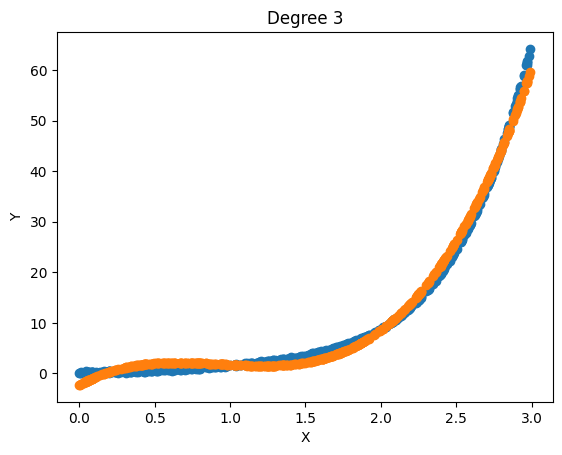

0.993758731191406

(500, 5)


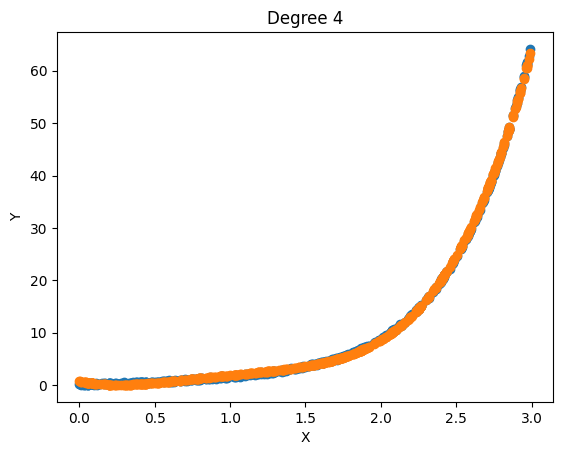

0.9997669404500598

(500, 6)


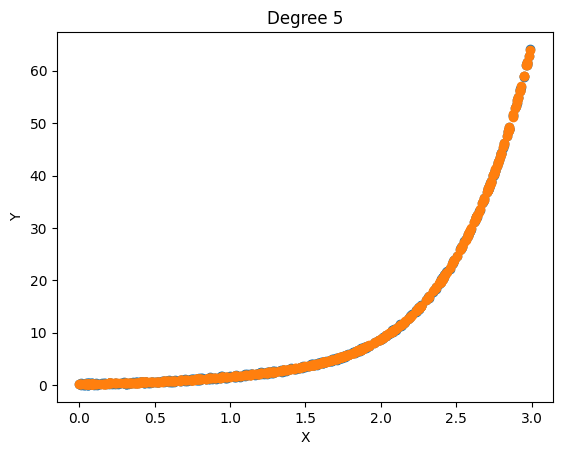

0.9999505304308682

(500, 7)


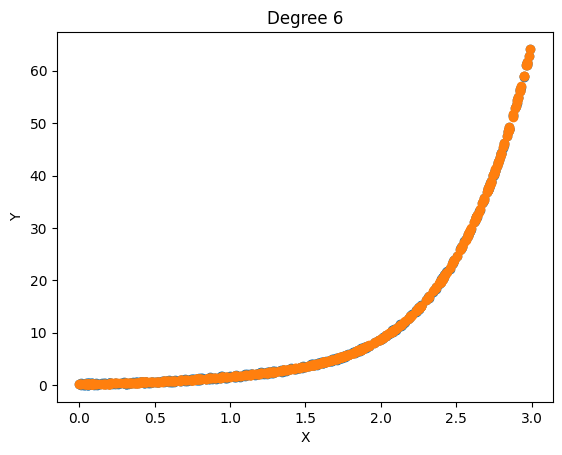

0.9999505529122537

(500, 8)


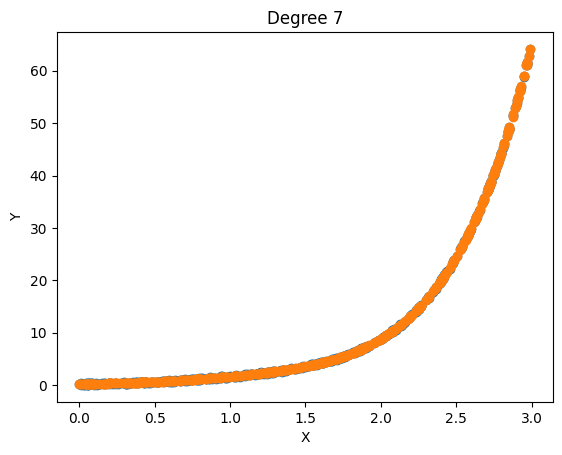

0.9999507529427742

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

scores = []
# Using Degrees 1 to 5, and seeing performance of the model
for i in range(1, 8): # degree = 1 to 5

    #creates polynomial feature
    poly = PolynomialFeatures(i)
    X_poly = poly.fit_transform(X)

    #Standardization
    scaler = StandardScaler()
    scaler.fit(X_poly)
    X_poly_scaled = scaler.transform(X_poly)

    print(X_poly_scaled.shape)
    #training model
    model = LinearRegression()
    model.fit(X_poly_scaled, y)

    #Prediction
    output = model.predict(X_poly_scaled)

    #Plotting
    fig = plt.figure()
    plt.scatter(X, y, label="samples")
    plt.scatter(X, output, label="prediction")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Degree {i}")
    plt.show()
    display(model.score(X_poly_scaled, y))
    scores.append(model.score(X_poly_scaled, y))

In [ ]:
model.coef_

array([[   0.        ,    1.02511952,   -7.28200067,   53.44457127,
        -132.16099255,  157.8891118 ,  -78.56597027,   21.74529265]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(5)
X_poly = poly.fit_transform(X).round(2)
#display(X_poly.shape) # shape of the generated features
n_features = X_poly.shape[1]
print(X_poly[:10,:])

[[1.000e+00 1.250e+00 1.570e+00 1.960e+00 2.450e+00 3.060e+00]
 [1.000e+00 2.160e+00 4.670e+00 1.009e+01 2.181e+01 4.712e+01]
 [1.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 9.100e-01 8.200e-01 7.500e-01 6.800e-01 6.100e-01]
 [1.000e+00 4.400e-01 1.900e-01 9.000e-02 4.000e-02 2.000e-02]
 [1.000e+00 2.800e-01 8.000e-02 2.000e-02 1.000e-02 0.000e+00]
 [1.000e+00 5.600e-01 3.100e-01 1.700e-01 1.000e-01 5.000e-02]
 [1.000e+00 1.040e+00 1.070e+00 1.110e+00 1.160e+00 1.200e+00]
 [1.000e+00 1.190e+00 1.420e+00 1.690e+00 2.010e+00 2.390e+00]
 [1.000e+00 1.620e+00 2.610e+00 4.220e+00 6.830e+00 1.104e+01]]
